# **Importing**

---



In [2]:
print('Hello World')    #obligatory

Hello World


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
Y = bank_marketing.data.targets

In [6]:
X.shape

(45211, 16)

In [7]:
Y.shape

(45211, 1)

In [8]:
X.head(-20)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,59,NaN,married,NaN,no,1500,no,no,cellular,16,nov,280,1,104,2,failure
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,NaN
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [10]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


A primary inspection reveals existence of **null values** in various columns of the X variables.

*We will now dive deeper into the dataset and determine the cleaning treatment needed based on the metadata.*

# **Cleaning**

---



**METADATA**
*   X1: Age of the individual; numerical
*   X2: Type of job; categorical
*   X3: Marital Status; categorical
*   X4: Education level; categorical
*   X5: Does the individual have existing credit in the bank?; binary
*   X6: Average yearly balance in the bank account; numerical

*   X7: Is there a housing loan?; Binary

*   X8: Is there a personal loan?; Binary


*   X9: What kind of phone was the person contacted in?; categorical

*   X10: Day of a month the person was last contacted on; numerical

*   X11: Month the person was last contacted on; categorical

*   X12: Duration of the last phone call (in seconds); numerical

*   X13: Number of contacts performed during the campaign; numerical

*   X14: Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted); numeric
*   X15: Number of contacts performed before this campaign for the individual; numerical


*   X16: Outcome of the previous marketing campaign; categorical

In [11]:
X.rename(columns={'pdays': 'p_days'}, inplace=True)
X.rename(columns={'poutcome': 'prev_outcome'}, inplace=True)
X.rename(columns={'loan': 'personal'}, inplace=True)
X.rename(columns={'campaign': 'current_contact'}, inplace=True)
X.rename(columns={'previous': 'prev_contact'}, inplace=True)

/tmp/ipython-input-3678735752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'pdays': 'p_days'}, inplace=True)
/tmp/ipython-input-3678735752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'poutcome': 'prev_outcome'}, inplace=True)
/tmp/ipython-input-3678735752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'loan': 'personal'}, inplace=True)
/tmp/ipython-input-36787357


*   Renaming  poutcome as prev_outcome to mean outcome of previous campaign
* Renaming loan as personal in accordance with the variable ‘housing’ to mean if the customer has a housing loan or not
* Renaming campaign as current_contact to mean number of contacts done to a singular client in the current campaign
* Renaming previous as prev_contact in accordance with ‘current_contact’
* Renaming pdays as p_days in accordance with the general and the standard formats




In [12]:
X.isnull().mean().round(3)*100

,0
age,0.0
job,0.6
marital,0.0
education,4.1
default,0.0
balance,0.0
housing,0.0
personal,0.0
contact,28.8
day_of_week,0.0


We can already see huge amount of data missing for some of the variables. We will do a heatmap for an easier scan before and after the cleaning.

<Axes: >

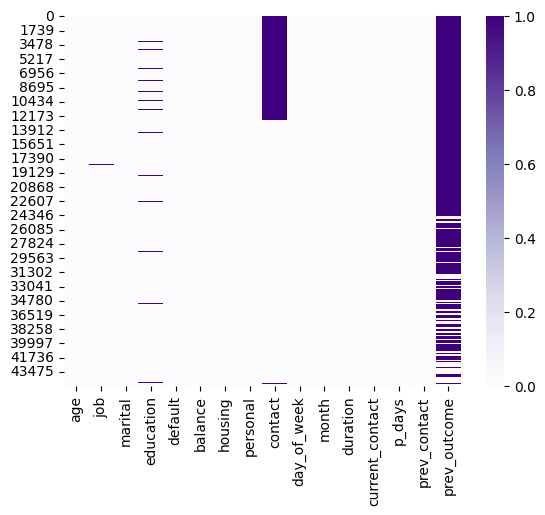

In [13]:
sns.heatmap(X.isnull(), cmap= 'Purples')

In [14]:
#Cleaning job
X['job'].value_counts()
X = X[X['job'].notna()]
X.shape

(44923, 16)

The job feature is a categorical type with 11 different types listed. There is no imbalance in one or two job types. Rather, multiple job types have similar counts. Only 0.6% of the values are null values. So, dropping the instances altogether is an apparent fix since filling the missing values with a random job will tamper the data unnecessarily. Hence, the records were dropped, lowering the number of instances to 44923.

In [15]:
#Cleaning education
#X['education'].value_counts() -- checked before values
X['education'] = X['education'].fillna(X['education'].mode()[0])
X['education'].value_counts()   #checked after values to confirm

/tmp/ipython-input-2115379261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = X['education'].fillna(X['education'].mode()[0])


,count
education,
secondary,24861
tertiary,13262
primary,6800


The education feature is also a categorical variable with only 3 categories: primary, secondary, and tertiary. An inspection of the counts showed a clear mode of secondary category with a mentionable gap. And the missing values accounted for 4.1% of the entire dataset. So, dropping the records would unnecessarily lose valuable data across many features, some of which may be sensitive to skewness. Hence, the missing values were filled with the mode: secondary.

In [16]:
#Cleaning contact
#X['contact'].value_counts() -- check before values
X = X.drop(columns = 'contact')

The contact feature is yet another categorical variable with the categories ‘telephone’ and ‘cellular’. And the missing values accounted for a mentionable 28.8% of the entire dataset. Dropping all such records would create a significant data loss. So, another option was considered - dropping the column, with the hypothesis that the variable is inherently not correlated with the outcome. The hypothesis was cross-checked with the existing body of literature, and in none of them was this variable in the top five of correlated variables. Hence, the column altogether was dropped.

In [17]:
X.head()

,age,job,marital,education,default,balance,housing,personal,day_of_week,month,duration,current_contact,p_days,prev_contact,prev_outcome
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,NaN


In [18]:
#Cleaning prev_outcome

#Done with the help of AI
# Get proportions of existing values
prop_existing = X['prev_outcome'].value_counts(normalize=True)

# Identify missing rows
missing_rows = X['prev_outcome'].isna()

# Randomly assign values to missing rows
X.loc[missing_rows, 'prev_outcome'] = np.random.choice(prop_existing.index, size=missing_rows.sum(), p=prop_existing.values)

Prev_outcome (originally labelled as poutcome) is one of the most important variables in the dataset, being directly comparable with the target variable. However, over 82% of the data was missing, with the rest filled by ‘success’, ‘failure’, and ‘other’. Seeing how in the existing literature, it consistently placed high as a significant variable, dropping the column was not an ideal option. And neither was dropping the corresponding records. Hence, an initiative was taken to fill the missing values in the proportion the filled categories were in. And it had to be randomized to offset any biasness stemming from this filling. Hence, the code was partially done with the help of AI. A method was suggested by the AI, and used - np.random.choice - to ensure that the values are filled randomly. There were multiple arguments in it, including size=missing.rows.sum() which ensured that the number of proportional values to generate matched with the number of null values. Hence, the cleaning process was done.


In [19]:
#Cleaning day
X = X.drop(columns = 'day_of_week')

The column day_of_week was dropped as it would create noise in a correlation.

In [20]:
#Cleaning duration
X = X.drop(columns= 'duration')

The column duration was dropped, as suggested by the repository. The column referred to the duration of the phone call, and would ascertain the outcome. That is, if the duration is 0, the y variable would certainly be a ‘No’. Again, longer durations would almost certainly mean it would be a ‘Yes’. Moreover, the goal is to predict the outcome before the call is made. However, by the end of the call, the outcome is certainly known. Hence, it was discarded to have a realistic predictive model.


<Axes: >

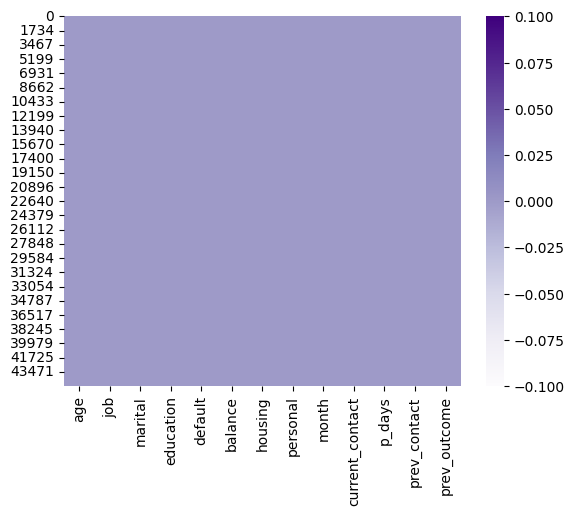

In [21]:
#Checking the aftermath
sns.heatmap(X.isnull(), cmap= 'Purples')

*Now, we will check for outliers.*

In [22]:
X['prev_outcome'].value_counts()

,count
prev_outcome,
failure,26570
other,10094
success,8259


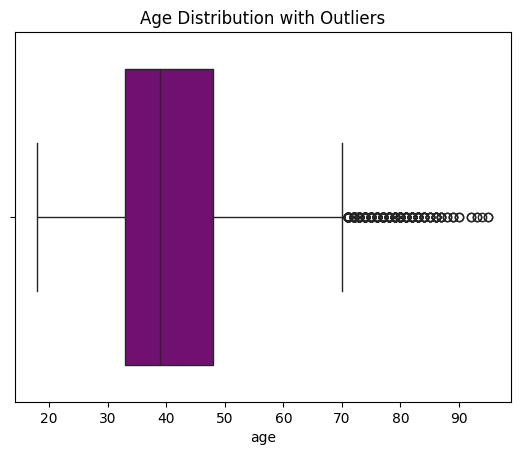

In [23]:
sns.boxplot(x=X['age'], color='Purple')
plt.title('Age Distribution with Outliers')
plt.show()

#outliers kept since they provide meaningful information

<Axes: xlabel='prev_contact'>

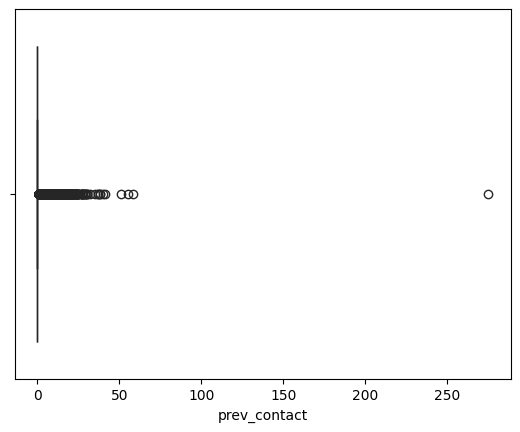

In [24]:
sns.boxplot(x=X['prev_contact'], color='Purple')

In [25]:
X['prev_contact'].max()
prev_outlier = X['prev_contact'].idxmax()
X.drop(index= prev_outlier, inplace=True)

In [26]:
X['prev_contact'].max()

58

The max value (outlier) of prev_contact was dropped for better visualization.

In [27]:
Y = Y.loc[X.index]

Finally, we aligned the values of Y to match with the cleaned rows of X.

*Now, we will do some correlation analysis of the dataset to hypothesize about the sample size we are working on.*

# **Exploring**

---



In [28]:
correlations = X.corr(numeric_only=True)
correlations

,age,balance,current_contact,p_days,prev_contact
age,1.000000,0.097949,0.004330,-0.023299,0.002169
balance,0.097949,1.000000,-0.015043,0.003698,0.021311
current_contact,0.004330,-0.015043,1.000000,-0.088233,-0.038378
p_days,-0.023299,0.003698,-0.088233,1.000000,0.541703
prev_contact,0.002169,0.021311,-0.038378,0.541703,1.000000


<Axes: >

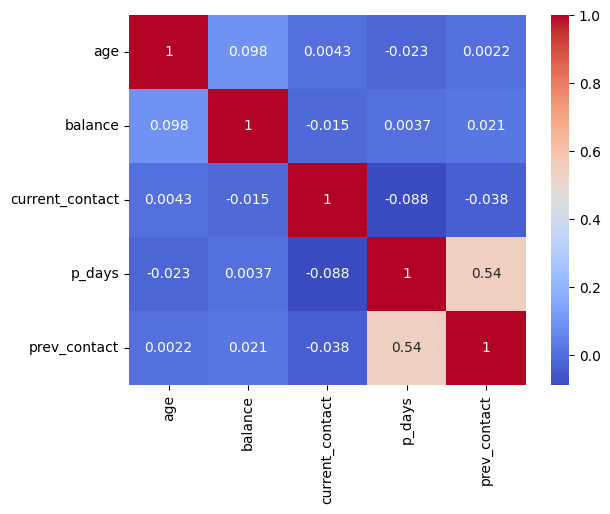

In [29]:
sns.heatmap(correlations, cmap='coolwarm', annot=True)

# **Modelling**

---



In [30]:
X.head()

,age,job,marital,education,default,balance,housing,personal,month,current_contact,p_days,prev_contact,prev_outcome
0,58,management,married,tertiary,no,2143,yes,no,may,1,-1,0,failure
1,44,technician,single,secondary,no,29,yes,no,may,1,-1,0,other
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,-1,0,success
3,47,blue-collar,married,secondary,no,1506,yes,no,may,1,-1,0,failure
5,35,management,married,tertiary,no,231,yes,no,may,1,-1,0,failure


In [31]:
#ENCODING

# Map target to binary (yes: 1, no: 0)
Y['y'] = Y['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'personal', 'month', 'prev_outcome']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numeric columns
numeric_cols = ['age', 'balance', 'current_contact', 'p_days', 'prev_contact']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [32]:
Y['y'].value_counts()

,count
y,
0,39667
1,5255


In [33]:
#TRAIN-VALIDATION-TEST SPLIT

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=2/3, random_state=42)





---


>DEFAULT MODEL



---



In [34]:
#DEFAULT MODEL RUN

default = xgb.XGBClassifier(
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='auc'
)
default.fit(X_train, Y_train)

Y_pred = default.predict(X_test)
Y_train_pred = default.predict(X_train)
roc_train = roc_auc_score(Y_train, Y_train_pred)
roc_test = roc_auc_score(Y_test, Y_pred)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The version 1 of the model is run with the default values of hyperparameters. Default values do not need to be specified but are still typed for the record. The hyperparameters mean:


*   **random_state** ensures that we get the same split every time
*   **max_depth** specifies how long/deep the decision tree is allowed to grow


*   **learning_rate** determines how much each tree contributes to the prediction
*   **n_estimators** specify the number of trees





In [35]:
roc_train

np.float64(0.5932648305609955)

In [36]:
roc_test

np.float64(0.5782215113616445)

In [37]:
accuracy_score(Y_test, Y_pred)

0.887813021702838

In [38]:
cm_test = confusion_matrix(Y_test, Y_pred)
cm_test

array([[7792,   95],
       [ 913,  185]])

In [39]:
precision_score(Y_test, Y_pred)

0.6607142857142857

In [40]:
recall_score(Y_test, Y_pred)

0.16848816029143898

**INTERPRETATION**
* The predictive power (55%+) is modest at best. It does not do a good job at generalizing.
* The small gap in the ROC score between train and test data shows little to no overfitting.
* The accuracy score of 88% is seemingly satisfactory. However, in an imbalanced dataset such as this one, that score is misleading since a model can predict all "no" (most values are "no"( and still score high.
* The confusion matrix and the subsequent scores reveal the efficacy better. Only 17% recall means 83% of the 'yes' cases were not predicted. A precision_score of 66% shows that the model is precise when it predicts "yes", but does not predict "yes' much.


*Now, we will do some hyperparameter tuning and regularization to account for the low predictive power and high false negatives.*







---


> MODEL VERSION 2

---





In [41]:
#VERSION 2 RUN

v2 = xgb.XGBClassifier(
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    min_child_weight=5,
    colsample_bytree=0.7,
    subsample= 0.7,
    use_label_encoder=False,
    eval_metric='auc'
)
v2.fit(X_train, Y_train)

Y_pred_v2 = v2.predict(X_test)
Y_train_pred_v2 = v2.predict(X_train)
roc_train_v2 = roc_auc_score(Y_train, Y_train_pred_v2)
roc_test_v2 = roc_auc_score(Y_test, Y_pred_v2)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


We mostly focused on the hyperparameters that affect the predictive power more than on those that affect overfitting.
* **max_depth** increased because it allows complex patterns. But kept within the 3-10 range to hedge for overfitting.
* **learning_rate** lowered as it improves generalizations. But that requires more estimators subsequently.
* **n_estimators** increased in line with lowered learning_rate, but at a risk of overfitting.
* **min_child_weight** controls whether a split is allowed, that is if the resulting child node has too few samples (or low weight), the split is rejected. Lower values have more complex trees whereas higher values are less overfitting.
* **colsample_bytree** parameter introduced (default value 1) so that each tree randomly uses x% (here 70%) of the features. The lower the value, the more the regularization.
* **subsample** parameter introduced (default value 1) so tat the model randomly selects a subset (here 70%) of the training sample. The lower the value, the more the regularization.

In [42]:
roc_train_v2

np.float64(0.620311014155036)

In [43]:
roc_test_v2

np.float64(0.5840493902603787)

In [44]:
accuracy_score(Y_test, Y_pred_v2)

0.8870339454646633

In [45]:
cm_test_v2 = confusion_matrix(Y_test, Y_pred_v2)
cm_test_v2

array([[7769,  118],
       [ 897,  201]])

In [46]:
precision_score(Y_test, Y_pred_v2)

0.6300940438871473

In [47]:
recall_score(Y_test, Y_pred_v2)

0.1830601092896175

**INTERPRETATION**
* Train AUC rose notably but test AUC did not rise as much. Model learned somewhat stronger structure but generalization gain is minimal.
* Precision decreased, so it is less often correct.
* Recall increased slightly; so the model catches slightly more positives.

*Now we will *



---


> MODEL VERSION 3

---







In [48]:
#VERSION 3 RUN

v3 = xgb.XGBClassifier(
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=800,
    min_child_weight=2,
    colsample_bytree=0.5,
    subsample=0.5,
    reg_alpha=0.05,  # L1 regularization
    reg_lambda=5,  # L2 regularization
    gamma=0.05,      # Minimum split gain
    use_label_encoder=False,
    eval_metric='auc'
)
v3.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=0.05, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
Y_pred_v3 = v3.predict(X_test)
Y_train_pred_v3 = v3.predict(X_train)
roc_train_v3 = roc_auc_score(Y_train, Y_train_pred_v3)
roc_test_v3 = roc_auc_score(Y_test, Y_pred_v3)

In [50]:
roc_train_v3

np.float64(0.6220869877785765)

In [51]:
roc_test_v3

np.float64(0.5853119299171841)

In [52]:
# Using probabilities for AUC (better than predictions for smooth scoring)
Y_prob_v3_train = v3.predict_proba(X_train)[:, 1]
Y_prob_v3_test = v3.predict_proba(X_test)[:, 1]
Y_pred_v3_train = v3.predict(X_train)
Y_pred_v3_test = v3.predict(X_test)

In [53]:
roc_train_v3_alt = roc_auc_score(Y_train, Y_prob_v3_train)
roc_train_v3_alt

np.float64(0.8269771536230447)

In [54]:
roc_test_v3_alt = roc_auc_score(Y_test, Y_prob_v3_test)
roc_test_v3_alt

np.float64(0.7497288083062141)

In [55]:
cm_test_v3 = confusion_matrix(Y_test, Y_pred_v3_test)
cm_test_v3

array([[7753,  134],
       [ 892,  206]])

In [56]:
precision_test_v3 = precision_score(Y_test, Y_pred_v3_test)
precision_test_v3

0.6058823529411764

In [57]:
recall_test_v3 = recall_score(Y_test, Y_pred_v3_test)
recall_test_v3

0.18761384335154827

**INTERPRETATION**

Regularization metrics L1, L2, and min_split_loss(gamma) were added as hyperparameters. Then we did some more hyperparameter tuning, which affected the scores minimally. Then we went for a different approach and used probabilities for smooth scoring. Due to that, the precision decreased slightly, the recall remained the same, but the predictive power of the model became much higher. It was overfitted (train-test AUC score difference more than 10pp) at first. But tuning the hyperparameters that specifically work to minimize overfitting (such as raised regularization or loweered max_depth), we minimized that difference. Among the three, this turned out to be the best version owing to a signficant increase in predictive power, with the trade-off of more overfitting.

In [58]:
# Loss Function

r2 = r2_score(Y_test, Y_prob_v3_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_prob_v3_test))


print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.1518
RMSE: 0.3016


In [59]:
#Feature Importance

importances = v3.get_booster().get_score(importance_type='gain')
importances = pd.Series(importances).sort_values(ascending=False)
print("\nTop feature importances:")
print(importances.head(10))



Top feature importances:
prev_outcome_success    18.391094
month_mar               14.939095
housing_yes             10.477811
month_oct                7.902562
prev_contact             7.600902
month_may                6.977685
month_sep                5.748309
p_days                   5.278636
month_nov                5.060958
personal_yes             4.916984
dtype: float64


So, prior campaign success can predict the model well. So does having a housing loan. There are quite a few months that do the same. And that can be attributed to having more to save during off-holiday seasons.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:42] WARNING: /w

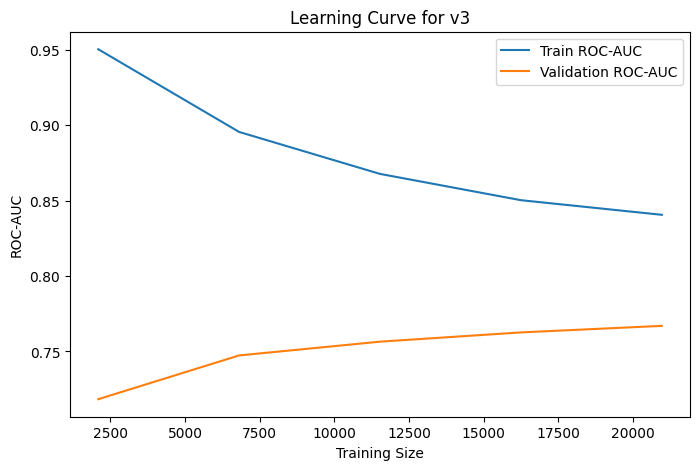

In [60]:
#Learning Curve

train_sizes, train_scores, val_scores = learning_curve(v3, X_train, Y_train, cv=3, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Train ROC-AUC')
plt.plot(train_sizes, val_mean, label='Validation ROC-AUC')
plt.xlabel('Training Size')
plt.ylabel('ROC-AUC')
plt.title('Learning Curve for v3')
plt.legend()
plt.show()

Hence, there is still some overfitting in the model. More data will help as validation AUC improves with training size.

In [61]:
# Cross-validation - General

dtrain = xgb.DMatrix(X_train, label=Y_train)

cv_results = xgb.cv(
    params=v3.get_params(),
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    metrics='auc',
    early_stopping_rounds=20,
    as_pandas=True,
    seed=42
)

print(cv_results.tail(1))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:225: UserWarning: [12:03:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:231: UserWarning: [12:03:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
199        0.799407       0.001908       0.770344      0.009662


In [62]:
# Cross validation - Classification

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_scores = []
recall_scores = []

for train_idx, val_idx in skf.split(X_train, Y_train):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_fold_train, Y_fold_val = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # Train v3 on fold
    v3.fit(X_fold_train, Y_fold_train)

    # Predict on fold validation
    Y_prob_fold_val = v3.predict_proba(X_fold_val)[:, 1]
    Y_pred_fold_val = v3.predict(X_fold_val)

    # Metrics
    roc_scores.append(roc_auc_score(Y_fold_val, Y_prob_fold_val))
    recall_scores.append(recall_score(Y_fold_val, Y_pred_fold_val))

# Average results
print("Stratified K-Fold Average ROC-AUC:", np.mean(roc_scores))
print("Stratified K-Fold Average Recall:", np.mean(recall_scores))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:03:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:03:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:03:24] WARNING: /w

Stratified K-Fold Average ROC-AUC: 0.7687542824561838
Stratified K-Fold Average Recall: 0.21903448275862072


We did a K-fold cross-validation that shows decent generalization with mild overfitting and low variability. But for classification, a better method is Stratified K-fold. We ran that because it accounts for class imbalance (like in our case) and shows how our model performs across multiple balanced train-test splits. The recall score also jumped from 18% to 22% this way.

# **Comparing**

---



*XGBoost is essentially a Decision Tree Classifier. More specifically, it uses Gradient Boosting. So, we will compare our final model with the regular Decision Tree, Gradient Boosting (GBM), and Light GBM as covered in our course.*

In [63]:
#DECISION TREE CLASSIFIER------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier

# Defining and training Decision Tree with default settings
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Predictions and probabilities
Y_pred_dt_train = dt.predict(X_train)
Y_prob_dt_train = dt.predict_proba(X_train)[:, 1]
Y_pred_dt_test = dt.predict(X_test)
Y_prob_dt_test = dt.predict_proba(X_test)[:, 1]

# Metrics
roc_train_dt = roc_auc_score(Y_train, Y_prob_dt_train)
roc_test_dt = roc_auc_score(Y_test, Y_prob_dt_test)
recall_test_dt = recall_score(Y_test, Y_pred_dt_test)
cm_test_dt = confusion_matrix(Y_test, Y_pred_dt_test)

print("Decision Tree Performance:")
print(f"Train ROC-AUC: {roc_train_dt:.4f}")
print(f"Test ROC-AUC: {roc_test_dt:.4f}")
print(f"Test Recall: {recall_test_dt:.4f}")
print("Test Confusion Matrix:\n", cm_test_dt)


Decision Tree Performance:
Train ROC-AUC: 1.0000
Test ROC-AUC: 0.5873
Test Recall: 0.2805
Test Confusion Matrix:
 [[7046  841]
 [ 790  308]]


In [64]:
#GRADIENT BOOST----------------------------------------------------------------

from sklearn.ensemble import GradientBoostingClassifier

# Defining and training Gradient Boosting with default settings
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, Y_train)

# Predictions and probabilities
Y_pred_gb_train = gb.predict(X_train)
Y_prob_gb_train = gb.predict_proba(X_train)[:, 1]
Y_pred_gb_test = gb.predict(X_test)
Y_prob_gb_test = gb.predict_proba(X_test)[:, 1]

# Metrics
roc_train_gb = roc_auc_score(Y_train, Y_prob_gb_train)
roc_test_gb = roc_auc_score(Y_test, Y_prob_gb_test)
recall_test_gb = recall_score(Y_test, Y_pred_gb_test)
cm_test_gb = confusion_matrix(Y_test, Y_pred_gb_test)

print("Gradient Boosting Performance:")
print(f"Train ROC-AUC: {roc_train_gb:.4f}")
print(f"Test ROC-AUC: {roc_test_gb:.4f}")
print(f"Test Recall: {recall_test_gb:.4f}")
print("Test Confusion Matrix:\n", cm_test_gb)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Performance:
Train ROC-AUC: 0.7838
Test ROC-AUC: 0.7493
Test Recall: 0.1630
Test Confusion Matrix:
 [[7780  107]
 [ 919  179]]


In [65]:
#LIGHT GBM---------------------------------------------------------------------

from lightgbm import LGBMClassifier


# Defining and training LightGBM with default settings
lgb = LGBMClassifier(random_state=42, verbose=-1)
lgb.fit(X_train, Y_train)

# Predictions and probabilities
Y_pred_lgb_train = lgb.predict(X_train)
Y_prob_lgb_train = lgb.predict_proba(X_train)[:, 1]
Y_pred_lgb_test = lgb.predict(X_test)
Y_prob_lgb_test = lgb.predict_proba(X_test)[:, 1]

# Metrics
roc_train_lgb = roc_auc_score(Y_train, Y_prob_lgb_train)
roc_test_lgb = roc_auc_score(Y_test, Y_prob_lgb_test)
recall_test_lgb = recall_score(Y_test, Y_pred_lgb_test)
cm_test_lgb = confusion_matrix(Y_test, Y_pred_lgb_test)

print("LightGBM Performance:")
print(f"Train ROC-AUC: {roc_train_lgb:.4f}")
print(f"Test ROC-AUC: {roc_test_lgb:.4f}")
print(f"Test Recall: {recall_test_lgb:.4f}")
print("Test Confusion Matrix:\n", cm_test_lgb)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LightGBM Performance:
Train ROC-AUC: 0.8634
Test ROC-AUC: 0.7502
Test Recall: 0.1821
Test Confusion Matrix:
 [[7752  135]
 [ 898  200]]


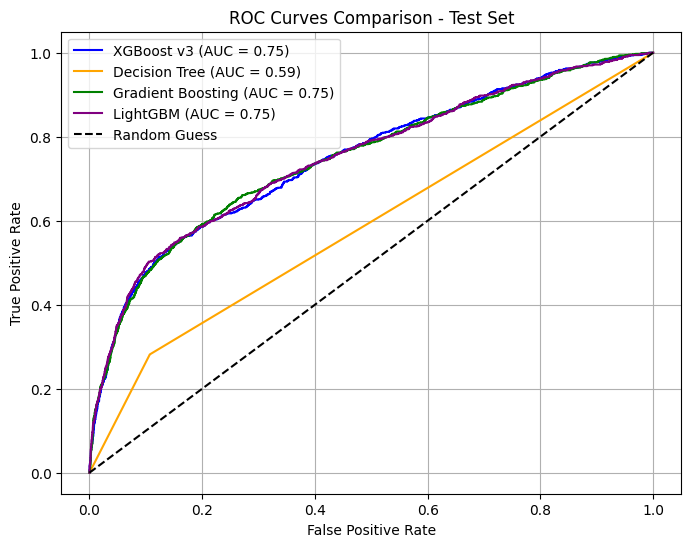

In [66]:
#BENCHMARKING

from sklearn.metrics import roc_curve

# Getting test probabilities for each model
Y_prob_v3_test = v3.predict_proba(X_test)[:, 1]
Y_prob_dt_test = dt.predict_proba(X_test)[:, 1]
Y_prob_gb_test = gb.predict_proba(X_test)[:, 1]
Y_prob_lgb_test = lgb.predict_proba(X_test)[:, 1]

# Computing ROC curves and AUC scores
fpr_v3, tpr_v3, _ = roc_curve(Y_test, Y_prob_v3_test)
auc_v3 = roc_auc_score(Y_test, Y_prob_v3_test)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_prob_dt_test)
auc_dt = roc_auc_score(Y_test, Y_prob_dt_test)
fpr_gb, tpr_gb, _ = roc_curve(Y_test, Y_prob_gb_test)
auc_gb = roc_auc_score(Y_test, Y_prob_gb_test)
fpr_lgb, tpr_lgb, _ = roc_curve(Y_test, Y_prob_lgb_test)
auc_lgb = roc_auc_score(Y_test, Y_prob_lgb_test)

# Plotting combined ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_v3, tpr_v3, label=f'XGBoost v3 (AUC = {auc_v3:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='orange')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', color='green')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - Test Set')
plt.legend()
plt.grid(True)
plt.show()

Here, we can see that GBM, XGB, LGBM all are powerful versions of the Decision Tree Classifier (DTC), and similar in terms of performance.

Notably, the original decision tree works perfectly with the training data (ROC AUC score 1) but scores about as much as our default XGBoost version (~59%). DTC’s low test AUC reflects its inability to handle the ~11% 'yes' class effectively without ensemble techniques. Boosting models, especially XGBoost v3 with scale_pos_weight, better rank the minority class.

The higher recall suggests DTC is less conservative, catching more 'yes' cases but likely misclassifying more 'no' cases (lower precision). Boosting models, tuned for balance (e.g., XGBoost’s scale_pos_weight), sacrifice some recall to reduce FP, prioritizing precision and overall AUC for a more balanced marketing strategy.